In [ ]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import scipy as sp

<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-280 Estadística Computacional I-2021 </h1>

<H3 align='center'> Tema 1 - Análisis Exploratorio de Datos  </H3>
<hr style="height:2px;border:none"/>

### **Formalidades**  
* Es posible utilizar apuntes, libros, papers, ejemplos y cualquier otro material que desee de internet, pero debe ser usted quien desarrolle los ejercicios y comente los resultados en el Notebook que entregará. 
* Puede utilizar Python o R. En ambos casos, no puede usar funciones estadísticas específicas, excepto aquellas correspondientes al cálculo de medidas de tendencia ó dispersión (media, desviación estándar, etc) y aquellas correspondientes al cálculo de probabilidades y percentiles sobre las distribuciones revisadas en clases (pnorm, qnorm, pt, qt), etc.
* Se podrá trabajar en grupos de **dos personas**, las cuales deberán estar inscritas a través de __[Aula](https://aula.usm.cl/)__.
* Además del Notebook, deberán entregar un video explicando lo que hizo, paso a paso, como en los ejemplos entregados en AULA. Este vídeo es **individual**, es decir, cada integrante debe hacerlo por separado (debiendo utilizar el mismo Jupyter Notebook). El video puede ser subido a una plataforma externa como Youtube, Google Drive, ó Dropbox. El **link a compartir** (*visible para cualquier usuario con el link*) debe ir dentro del Notebook.
* La nota de esta actividad es grupal.

### **Entrega** 
* **Formato**: Se debe realizar una **única** entrega por grupo (un representate del grupo) a través de  __[**Aula**](https://aula.usm.cl/)__.
* **Archivo**: Sus respuestas deben ser entregadas en forma de Jupyter Notebook, incluyendo **dos link** a los vídeos explicativos, uno por cada integrante.
    * **Vídeo**: Debe grabar la pantalla (Jupyter Notebok) donde se realiza la explicación de la actividad, con una duración de 10 a 15 minutos.
* **Fecha límite**: Viernes 16 de Abril a las 23:59.

<hr style="height:2px;border:none"/>


## Enunciado

<img src="https://image.freepik.com/vector-gratis/banner-horizontal-sobre-tema-trabajo-linea-abra-computadora-portatil-minimalismo_200484-27.jpg" width="31%"  style="float: right;" />

Una empresa de latinoamérica está realizando un estudio del desempeño productivo de sus trabajadores en la modalidad online de trabajo. En particular, se está estudiando y comparando tres diferentes condiciones $C$ sobre las cuales los empleados realizan sus actividades de trabajo en casa. En esta actividad tendrá acceso a los datos para ayudar en el estudio, los cuales corresponden a una muestra finita sobre cada una de las condiciones ($C_1, C_2, C_3$). Cada valor en la muestra indica la medición del desempeño productivo de algún trabajador anónimo (*mayor indica un mejor desempeño, valor mínimo es 0*).

> En base al desempeño en modalidad presencial (lo cual no está disponible para esta actividad), la empresa define ciertos márgenes de pérdida referenciales a cada persona. En concreto se indicia lo siguiente: un desempeño aceptable, donde el trabajador se desenvuelve de la misma manera que lo hacía en su trabajo presencial, corresponde a un valor cercano a 10. Mientras que un valor menor a 5 se considera un desempeño inaceptable, donde el trabajador realiza menos actividades de las esperadas en el margen de trabajo online, por lo que podría generar pérdidas a la empresa. Por otro lado, un valor mayor a 20 corresponde a un desempeño sobresaliente el cual podría ayudar a acelerar ciertos proyectos y lograr más objetivos.


Los datos pueden ser descargados a través del siguiente link: __[muestraC1](https://raw.githubusercontent.com/FMena14/ML_usm/master/Estadistica/T1-Eval-Data/Muestra_C1.txt)__, __[muestraC2](https://raw.githubusercontent.com/FMena14/ML_usm/master/Estadistica/T1-Eval-Data/Muestra_C2.txt)__, __[muestraC3](https://raw.githubusercontent.com/FMena14/ML_usm/master/Estadistica/T1-Eval-Data/Muestra_C3.txt)__. Cada fila corresponde a un dato de la muestra, los archivos no tienen encabezado (la primera fila es el primer dato de la muestra).
> *Para descargar directamente en Jupyter puede ejecutar* (**solo sistemas unix**)

```
!wget https://raw.githubusercontent.com/FMena14/ML_usm/master/Estadistica/T1-Eval-Data/Muestra_C1.txt
!wget https://raw.githubusercontent.com/FMena14/ML_usm/master/Estadistica/T1-Eval-Data/Muestra_C2.txt
!wget https://raw.githubusercontent.com/FMena14/ML_usm/master/Estadistica/T1-Eval-Data/Muestra_C3.txt
```

---
### Actividades
*Para los análisis cuantitativos recuerde utilizar una precisión decimal más que los datos, sino su respuesta se considerará imprecisa y **podría** tener puntaje 0*.

> a) [5 pts] Describa la población del fenómeno aleatorio de estudio, la variable asociada y las muestras a trabajar ¿Cuántos datos tiene cada muestra?  

- Población: Los trabajadores de la empresa 
- Variable asociada: El desempeño de cada Trabajador
- Muestras a Trabajar: $C_1$, $C_2$ y $C_3$ que son datos sobre 3 condiciones de desempeño entre el trabajo online y presencial.

> b) [10 pts] Compare el desempeño sobre cada condición a través de los puntos centrales de tendencia (media y mediana). Comente con la información entregada en el enunciado acerca de los desempeños *aceptable*  ¿Qué información aporta el sesgo de los datos?  


In [ ]:
from numpy import mean, median, array
from pandas import DataFrame as dFrame
import matplotlib.pyplot as plt
import seaborn as sns

#Listas para almacenar los datos de cada muestra:
media = list()
mediana = list()
sesgo = list()

with open("Muestra_C1.txt") as M1file:
  dataSetM1 = []
  
  #Traspaso de datos del file a la lista como floats
  for dato in M1file:
    dataSetM1.append(float(dato.strip()))
  dataSetM1 = array(dataSetM1)

  #Calculo de media, mediana y sesgo almacenados en sus listas correspondientes
  media.append(round(mean(dataSetM1),3))
  mediana.append(median(dataSetM1))
  sesgo.append(round(media[0] - mediana[0], 3))

with open("Muestra_C2.txt") as M2file:
  dataSetM2 = []

  for dato in M2file:
    dataSetM2.append(float(dato.strip()))
  dataSetM2 = array(dataSetM2)

  media.append(round(mean(dataSetM2),3))
  mediana.append(median(dataSetM2))
  sesgo.append(round(media[1] - mediana[1], 3))

with open("Muestra_C3.txt") as M3file:
  dataSetM3 = []

  for dato in M3file:
    dataSetM3.append(float(dato.strip()))
  dataSetM3 = array(dataSetM3)

  media.append(round(mean(dataSetM3),3))
  mediana.append(median(dataSetM3))
  sesgo.append(round(media[2] - mediana[2], 3))


#Impresión tabla
dFrame({
    'Media': media,
    'Mediana' : mediana,
    'Sesgo' : sesgo}, ['C1','C2', 'C3'])

,Media,Mediana,Sesgo
C1,9.790,8.46,1.330
C2,10.144,10.29,-0.146
C3,12.118,13.14,-1.022


En base a los resultados, comparando los valores de media y mediana para las muestras $C_1$, $C_2$ y $C_3$ podemos concluir que la condicion $C_1$ es la con menor desempeño, sin inaceptable. Mientras que los datos tomados de la muestra $C_3$ presenta el mejor desempeño. 

Con los valores de los Sesgos, podemos notar que en el DataSet de $C_1$ existen outliers hacia el lado positivo de la recta, lo que quiere decir que hay outliers o más datos con mayor desempeño.

Respecto al Sesgo de $C_2$, al ser tan pequeño, quiere decir que la media y la mediana tienen valores bastante cercanos, por lo tanto no hay presencia de outliers, y si hay, es simetrica.

Sobre el Sesgo de $C_3$, al ser negativo, podemos concluir que existen _outliers_ con menor desempeño que el promedio o una mayor cantidad de datos con menor desempeño, que contrastan con algun outlier positivo. 

> c) [20 pts] Grafique el boxplot de cada muestra/condición y compare entre sí ¿Existe evidencia suficiente para concluir que alguna de las condiciones es mejor que las otras dos? Añada al gráfico la información que se entregó sobre los desempeños inaceptables, aceptables y sobresalientes, ¿Qué se puede comentar al respecto de las condiciones?  


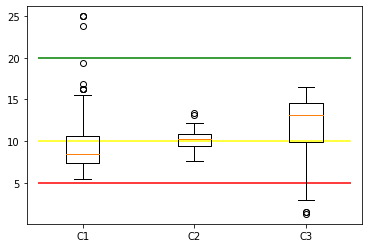

In [ ]:
allData = array([dataSetM1, dataSetM2, dataSetM3], dtype='object')

plt.boxplot([dataSetM1, dataSetM2, dataSetM3])
plt.xticks([1,2, 3], ['C1', 'C2',  'C3'])
plt.hlines(5 , 0.6, 3.4, color='red')
plt.hlines(10 , 0.6, 3.4, color='yellow')
plt.hlines(20 , 0.6, 3.4, color='green')
plt.show()


Con los datos obtenido anteriormente se puede argumentar que $C_3$ es la condicion mas deseada, ya que aproximadamente un 75% de la muestra se encuentra por sobre lo aceptable, ademas de que si tomamos en cuenta la media, esta es la mas alta de todas, con un 12.118, casi 2 puntos mas arriba que $C_2$, su mas proximo contrincante, si bien esta condicion sufre de outliers negativos, se ven absorbidos por el buen rendimiento en general de la muestra, como lo vemos en la media.

$C_1$ tiene casi $3/4$ de la muestra bajo el optimo, si bien no tiene ningun empleado bajo la linea de inaceptable, es la que esta mas cercana a esta de todas, con una media de 9.790 y mediana de	8.46, los outliers positivos que tiene, que cabe recalcar que son los unicos que pasan la barrera de sobresaliente, no son numericamente influyentes para el total de la muestra.

$C_2$ se destaca en ser la mas estable de todas, teniendo sus valores compactos alrededor de la linea aceptable, con unos pocos outliers positivos, por esto mismo tiene el menos sesgo de las tres condiciones.



> d) [15 pts] Analice la dispersión de cada muestra/condición a través de 3 medidas que entreguen información diferente. ¿Qué información aporta cada medida elegida? ¿Qué indica lo observado? Compare con lo analizado en c)  


In [ ]:
from numpy import var, std, max, min
from scipy import stats

desvStd = []
rango = []
IQR = []

desvStd.append(round(std(dataSetM1), 3))
desvStd.append(round(std(dataSetM2), 3))
desvStd.append(round(std(dataSetM3), 3))

rango.append(max(dataSetM1) - min(dataSetM1))
rango.append(max(dataSetM2) - min(dataSetM2))
rango.append(max(dataSetM3) - min(dataSetM3))

# Third quartile (Q3)
IQR.append(np.percentile(dataSetM1, 75, interpolation = 'midpoint'))
IQR.append(np.percentile(dataSetM2, 75, interpolation = 'midpoint'))
IQR.append(np.percentile(dataSetM3, 75, interpolation = 'midpoint'))

# First quartile (Q1)
IQR[0] -= np.percentile(dataSetM1, 25, interpolation = 'midpoint')
IQR[1] -= np.percentile(dataSetM2, 25, interpolation = 'midpoint')
IQR[2] -= np.percentile(dataSetM3, 25, interpolation = 'midpoint')
  

#Impresión tabla
dFrame({
    'Desviación Estandar': desvStd,
    'Rango' : rango,
    'IQR' : IQR}, ['C1','C2', 'C3'])

,Desviación Estandar,Rango,IQR
C1,3.955,19.56,3.390
C2,1.049,5.79,1.390
C3,3.493,15.29,4.695


La desviación estandar, nos dice que tan alejados están los datos del promedio. Por lo tanto podemos saber que tan representativa es la media de los dátos.  Ya que $C_1$ y $C_3$ tienen unas desviaciones relativamente grandes, podemos concluir que hay una cantidad considerable de datos superiores e inferiores a la media. Ya que relativamente la desviacion de $C_2$ es pequeña, sabemos que los datos tienden a estar cerca del promedio.

Lo dicho anteriormente se reafirma al ver los resultados del rango para cada muestra. Claramente hay una tendencia hacia el promedio en $C_2$, que no hay ni en $C_1$ ni en $C_3$.

El rango intercuartilico (IQR) cuantifica la extension la caja en los boxplot expuesto en la pregunta C), nos dice que rango posee el 50% intermedio, y se justifican los resultados de esta, ya que vemos que tanto $C_1$ como $C_3$ poseen cajas mas olgadas, siendo $C_3$ la mayor, mientras que $C_2$ es la caja mas compacta.

Comparando estos datos con la visualizacion de las condiciones en C), notamos que la desviacion estandar nos estrega aun mas evidencia de porque las cajas de $C_1$ y $C_3$, con desviaciones de 3.955 y 3.493 respectivamente  abarcan mas valores que la $C_2$ con 1.049, si ahora analizamos en rango, tenemos que $C_1$ es claramente la condicion con el mayor rango, se aprecia esto en los outliers superiores que superan lo sobresaliente, y lo valores menores que rozan lo inaceptable. La correlacion de IQR esta explicada en el parrafo superior. 

> e) [20 pts] En base a toda la información recolectada hasta este punto (medidas de tendencia, variabilidad y gráficos) ¿Cuál condición $C$ le recomendaría a la empresa inculcar sobre el resto de empleados? ¿Por qué? Apoye su elección en base a los tipos de desempeño.


Considerando toda la informacion recolectada hasta el momento, la condicion que le recomendaríamos a la empresa inculcar sobre el resto de los empleados sería $C_3$, ya que esta es la que precenta mas eficiencia en cuanto al grueso del personal. Pese a que es la única que presenta outliers inaceptables y habría que considerarlos al expandir la condicion al resto de los empleados; un 75% de los empleados pertenecientes a la muestra estan sobre lo aceptable. Por lo tanto podríamos asumir que al inculcarle esta condicion al resto de los empleados responderían de forma eficiente.

> f) [15 pts] Al volver a revisar el proceso de recolección de datos, se encontró con un trabajador que no había sido considerado antes, con un desempeño de 13. No se encontró la información de en cuál condición se encontraba. En base a lo realizado en la actividad, explique e implemente una técnica para tratar de inferir bajo qué condición se encontraba este trabajador olvidado. ¿Cuál condición? ¿Por qué? ¿Sería posible entregar un margen de error de su técnica?


> g) [15 pts] Ahora se le solicita realizar el estudio de qué ocurre si la empresa decide gradualmente enviar a sus mejores trabajadores (los con desempeño más alto) al trabajo presencial de oficina.  Compare cómo se ve afectada la media muestral de cada condición si un porcentaje $p$ de los trabajadores bajo esa condición son enviados a trabajo presencial (ya no formarían parte de esta muestra). Grafique la variación de $p$ en un rango $[0;0.99]$. En base a esto ¿Cuál condición sería recomendable mantener en trabajo online para evitar una baja en las medidas de tendencia central de trabajo online?
